In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df=pd.read_csv('/content/Dataset.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

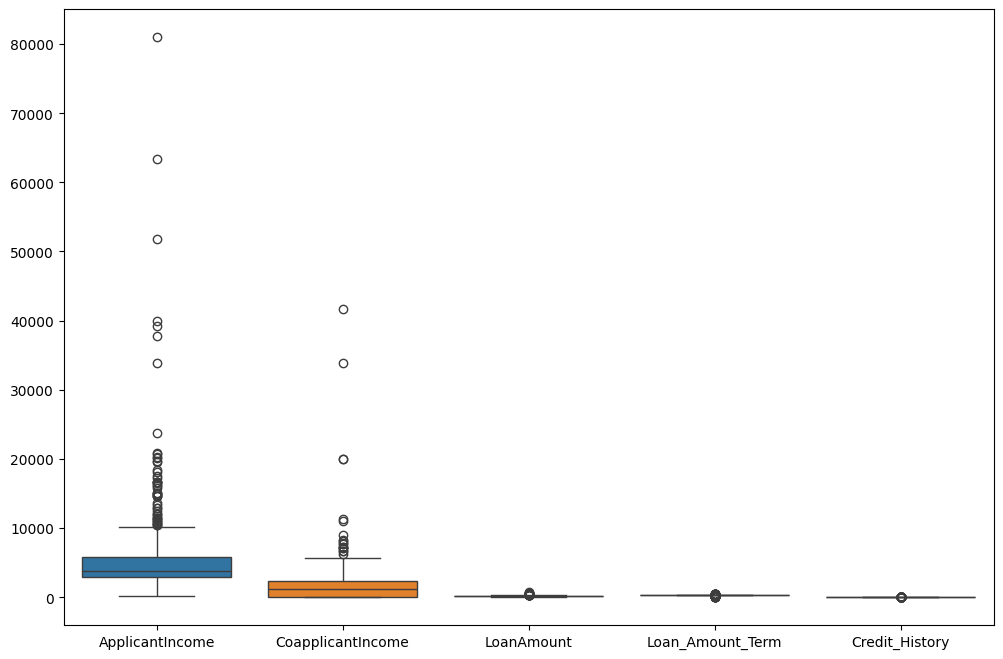

In [8]:
## checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [9]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df['LoanAmount'].median()

128.0

In [11]:
df['Gender'].mode()[0]

'Male'

In [12]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

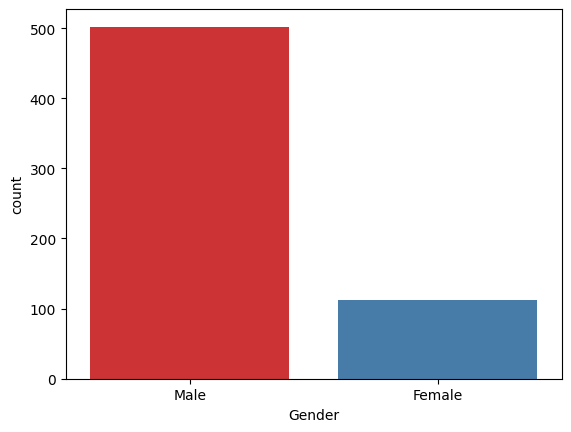

In [14]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

Number of people who took loan by Marriage
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

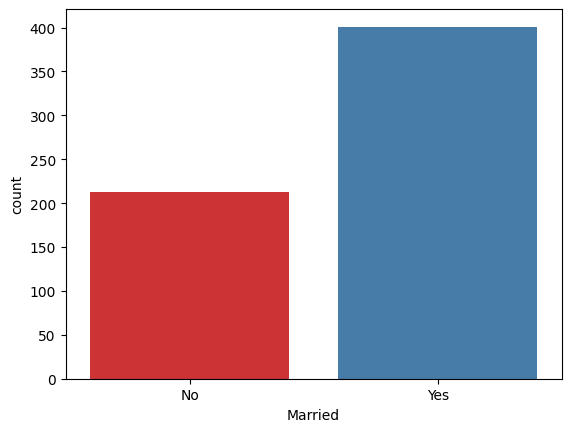

In [15]:
print('Number of people who took loan by Marriage')
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

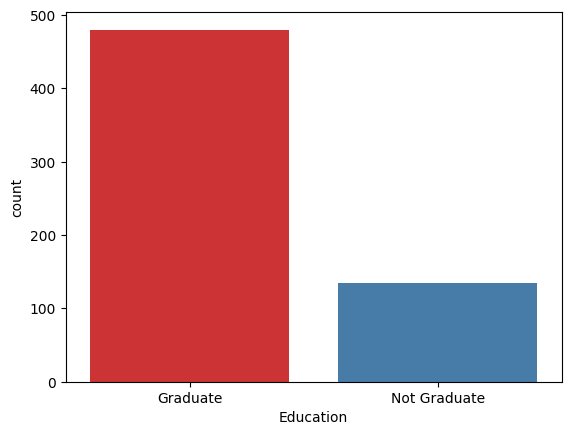

In [16]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df,palette='Set1')

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


<Axes: >

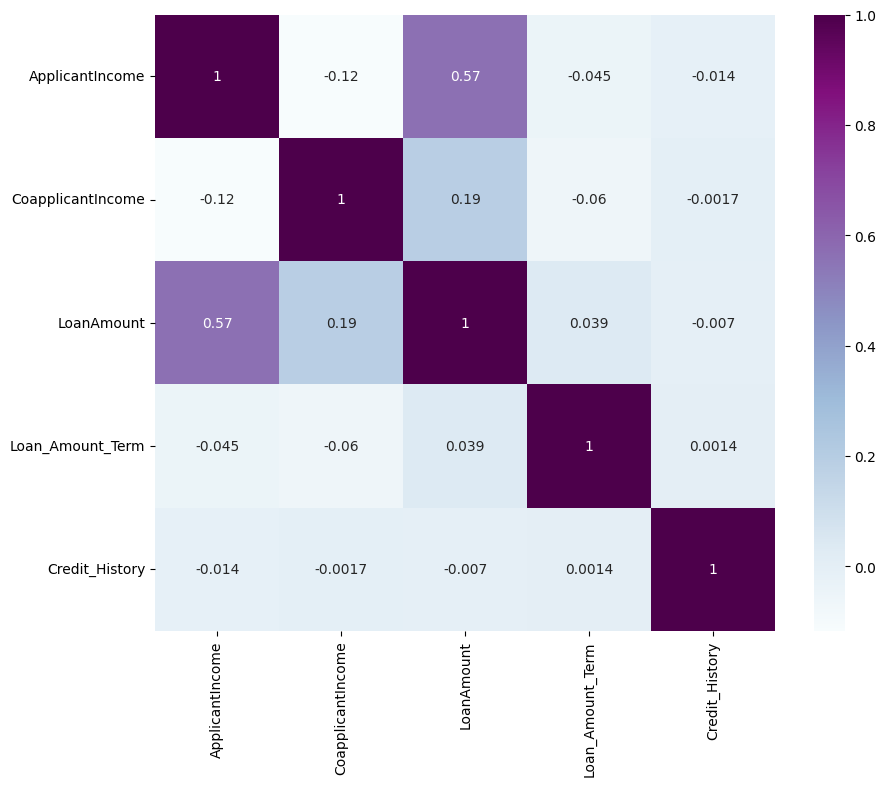

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

In [24]:
## feature engineering
## total income column

df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [25]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [26]:
## apply log transformation for normalisation

df['ApplicantIncomelog']=np.log(df['ApplicantIncome']+1)
df['LoanAmountlog']=np.log(df['LoanAmount']+1)
df['Loan_Amount_Termlog']=np.log(df['Loan_Amount_Term']+1)
df['total_Incomelog']=np.log(df['total_income']+1)

In [27]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_Incomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [28]:
## drop unnecessary columns
cols=['ApplicantIncome','LoanAmount','Loan_Amount_Term','total_income','Loan_ID','CoapplicantIncome']
df.drop(columns=cols,inplace=True)

In [29]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_Incomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [31]:
## changing categorical column into numerical column using encoding

from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']

le=LabelEncoder()
for col in cols:
  df[col]=le.fit_transform(df[col])



In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_Incomelog
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [33]:
## split dependent and independent data

x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [34]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_Incomelog
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [35]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [38]:
## importing all model

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [39]:
## Logistic regression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1=model1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_model1)

In [40]:
accuracy

0.7837837837837838

In [41]:
score=cross_val_score(model1,x,y,cv=6)
score

array([0.82524272, 0.77669903, 0.7745098 , 0.81372549, 0.84313725,
       0.83333333])

In [42]:
np.mean(score)*100

81.11079383209594

In [43]:
## Decision Tree Classifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2=model2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_model2)

In [44]:
print("Accuracy percentage of Decision Tree Classifier is ", accuracy*100)

Accuracy percentage of Decision Tree Classifier is  75.13513513513513


In [45]:
score=cross_val_score(model2,x,y,cv=6)
score

array([0.75728155, 0.68932039, 0.67647059, 0.65686275, 0.73529412,
       0.7254902 ])

In [46]:
print("Cross validation score of decision tree classifier is",np.mean(score)*100)

Cross validation score of decision tree classifier is 70.67865981343994


In [47]:
## Random Forest Classifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3=model3.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_model3)

In [48]:
print("Accuracy percentage of Random Forest Classifier is",accuracy*100)

Accuracy percentage of Random Forest Classifier is 77.83783783783784


In [49]:
score=cross_val_score(model3,x,y,cv=10)
score

array([0.74193548, 0.77419355, 0.75806452, 0.77419355, 0.78688525,
       0.80327869, 0.83606557, 0.80327869, 0.7704918 , 0.83606557])

In [50]:
print("Cross Validation score of Random Forest Classifier is",np.mean(score)*100)

Cross Validation score of Random Forest Classifier is 78.84452670544685


In [51]:
## KNearest Neighbors model
model4=KNeighborsClassifier()
model4.fit(x_train,y_train)
y_pred_model4=model4.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_model4)

In [52]:
print("Accuracy percentage of K Neighbors Classifier is ",accuracy*100)

Accuracy percentage of K Neighbors Classifier is  72.43243243243244


In [53]:
score=cross_val_score(model4,x,y,cv=7)
score

array([0.79545455, 0.75      , 0.71590909, 0.73863636, 0.76136364,
       0.7816092 , 0.73563218])

In [54]:
print("Cross validation score of N Neighbors Classifier is ",np.mean(score)*100)

Cross validation score of N Neighbors Classifier is  75.40864308105687


In [55]:
def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

In [56]:
generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.66      0.62      0.63        65
           1       0.80      0.82      0.81       120

    accuracy                           0.75       185
   macro avg       0.73      0.72      0.72       185
weighted avg       0.75      0.75      0.75       185


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.83      0.46      0.59        65
           1       0.77      0.95      0.85       120

    accuracy                